In [1]:
import argparse
import sys
import pickle
import math
import os 

import torch
from transformers import LayoutLMv3Tokenizer, AutoConfig

sys.path.append('../src')
from model import My_DataLoader
from model.LayoutLMv3forMIM import LayoutLMv3ForPretraining

/home/is/hikaru-si/.pyenv/versions/3.8.6/envs/exp_005/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [50]:
parser = argparse.ArgumentParser()
parser.add_argument("--tokenizer_vocab_dir", type=str, required=True)
parser.add_argument("--input_file", type=str, required=True)
parser.add_argument("--model_params", type=str)
parser.add_argument("--ratio_train", type=float,default=0.9)
parser.add_argument("--output_model_dir", type=str, required=True)
parser.add_argument("--output_file_name", type=str, required=True)
parser.add_argument("--model_name", type=str, required=True)
parser.add_argument("--batch_size", type=int, default=2)
parser.add_argument("--leaning_rate", type=int, default=1e-5)
parser.add_argument("--max_epochs", type=int, default=1)
args_list = ["--tokenizer_vocab_dir", "../data/vocab/tokenizer_vocab/","--input_file",
            "../data/preprocessing_shared/wpa_10000/",
            "--output_model_dir", "../data/train/model/", \
            "--output_file_name", "model.param", \
            "--batch_size", "4", \
            "--model_name", "microsoft/layoutlmv3-base", \
              "--model_params", "../data/train/pretrain_lr_1e-4_datasiez_10_batch_32/epoch_3/checkpoint.cpt"]
args = parser.parse_args(args_list)

In [48]:
tokenizer = LayoutLMv3Tokenizer(f"{args.tokenizer_vocab_dir}vocab.json", f"{args.tokenizer_vocab_dir}merges.txt")
ids = range(tokenizer.vocab_size)
vocab = tokenizer.convert_ids_to_tokens(ids)

In [49]:
data = []
input_names = os.listdir(args.input_file)
for file_name in input_names[0:1]:
    print(file_name)
    with open(f"{args.input_file}{file_name}", "rb") as f:
        d = pickle.load(f)
        data += d

0.pkl


In [5]:
vlli

NameError: name 'vlli' is not defined

In [ ]:
len(data), data[0].keys()

(23274,
 dict_keys(['input_ids', 'bbox', 'pixel_values', 'label', 'bool_masked_pos', 'alignment_labels']))

In [ ]:
# data[0]["bool_masked_pos"], data[0]["label"]

In [70]:
criterion = torch.nn.CrossEntropyLoss()

In [ ]:
# checkpoint = torch.load(args.model_params, map_location=torch.device('cpu'))

KeyboardInterrupt: 

In [101]:
device_ids = list(range(torch.cuda.device_count()))

In [51]:
if not args.model_params is None:
    print("load checkpoint")
    checkpoint = torch.load(args.model_params, map_location=torch.device('cpu'))
    config = AutoConfig.from_pretrained(args.model_name)
    config.num_visual_tokens = 8192
    model = LayoutLMv3ForPretraining(config)
    model.load_state_dict(checkpoint["model_state_dict"])
else:
    config = AutoConfig.from_pretrained(args.model_name)
    config.num_visual_tokens = 8192
    model = LayoutLMv3ForPretraining(config)
    Roberta_model = RobertaModel.from_pretrained("roberta-base")
    ## embedidng 層の重みをRobertaの重みで初期化
    weight_size = model.state_dict()["model.embeddings.word_embeddings.weight"].shape
    for i in range(weight_size[0]):
      model.state_dict()["model.embeddings.word_embeddings.weight"][i] = \
      Roberta_model.state_dict()["embeddings.word_embeddings.weight"][i]

load checkpoint


In [102]:
#modelをGPUへ
model = torch.nn.DataParallel(model, device_ids = device_ids)
model = model.to(f'cuda:{model.device_ids[0]}')

IndexError: list index out of range

In [57]:
checkpoint.keys()

dict_keys(['epoch', 'train_loss_list', 'valid_loss_list', 'model_state_dict', 'optimizer_state_dict'])

In [58]:
len(checkpoint["valid_loss_list"])

22

In [73]:
torch.tensor(list(range(len(checkpoint["train_loss_list"]))))*1314

tensor([    0,  1314,  2628,  3942,  5256,  6570,  7884,  9198, 10512, 11826,
        13140, 14454, 15768, 17082, 18396, 19710, 21024, 22338, 23652, 24966,
        26280, 27594])

In [87]:
 a =[ 0,  1314,  2628,  3942,  5256,  6570,  7884,  9198, 10512, 11826, 13140, 14454, 15768, 17082, 18396, 19710, 21024, 22338, 23652,24966,26280, 27594]
 a
 len(a)

22

In [86]:
 a =[ 0,  1314,  2628,  3942,  5256,  6570,  7884,  9198, 10512, 11826, 13140, 14454, 15768, 17082, 18396, 19710, 21024, 22338, 23652,24966,26280]
 len(a)

21

In [88]:
a= [0, 1314, 2628, 3942, 5265, 6570, 7884, 9198, 10512, 11826, 13140,13141, 14455, 15769, 17083, 18397, 19711, 21025, 22339, 23653, 24967, 26281]

In [94]:
len(a)

22

In [90]:
import matplotlib.pyplot as plt

In [93]:
len(checkpoint["train_loss_list"])

22

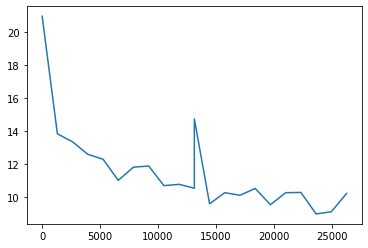

In [95]:
plt.plot(a , checkpoint["train_loss_list"])
plt.show()

In [59]:
len(checkpoint["train_loss_list"])

22

In [35]:
args.max_epochs = 5
args.max_epochs

5

In [65]:
epochs = range(args.max_epochs)
epochs[0]

0

In [40]:
epochs = range(checkpoint["epoch"] +1, args.max_epochs)
epochs

range(2, 5)

In [38]:
epochs

range(2, 5)

In [26]:
checkpoint["epoch"]

1

In [34]:
for i in range(checkpoint["epoch"] +1, args.max_epochs ):
  print(i)

2
3
4


In [29]:
 for i in list(range(5)):
  print(i)

0
1
2
3
4


In [25]:
if  args.model_params is not None:
    checkpoint = torch.load(args.model_params, map_location=torch.device('cpu'))
    config = AutoConfig.from_pretrained(args.model_name)
    config.num_visual_tokens = 8192
    model = LayoutLMv3ForPretraining(config)
    model.load_state_dict(checkpoint["model_state_dict"])
else:
    config = AutoConfig.from_pretrained(args.model_name)
    config.num_visual_tokens = 8192
    model = LayoutLMv3ForPretraining(config)
    # Roberta_model = RobertaModel.from_pretrained("roberta-base")
    # ## embedidng 層の重みをRobertaの重みで初期化
    # weight_size = model.state_dict()["model.embeddings.word_embeddings.weight"].shape
    # for i in range(weight_size[0]):
    #   model.state_dict()["model.embeddings.word_embeddings.weight"][i] = \
    #   Roberta_model.state_dict()["embeddings.word_embeddings.weight"][i]

In [52]:
n_train = math.floor(len(data) * args.ratio_train)
train_data = data[:n_train]
valid_data = data[n_train:]
len(train_data), len(valid_data)

(20946, 2328)

In [53]:
import random
my_dataloader = My_DataLoader.My_Dataloader(vocab, random)
train_dataloader = my_dataloader(train_data, batch_size=args.batch_size, shuffle=True)
valid_dataloader = my_dataloader(valid_data, batch_size=args.batch_size, shuffle=False)

In [8]:
def cal_ml_loss(text_logits, batch):
    t = []
    for i in range(len(batch["ml_position"])):
        if len(batch["ml_position"][i]) == 0:
            continue
        t.append(text_logits[i][batch["ml_position"][i]])
    if len(t) == 0:
        return 
    predict_word_token = torch.cat(t)
    labels = torch.cat(batch["ml_label"])
    print(predict_word_token.shape)
    print(labels.shape)
    # labels = labels.to(f'cuda:{model.device_ids[0]}')
    loss = criterion(predict_word_token + 1e-12, labels)
    return loss

In [9]:
def cal_mi_loss(image_logits, batch):
    image_logits = image_logits[:,1:]
    predict_visual_token = image_logits[batch["bool_mi_pos"]].to(torch.float32)
    labels = torch.cat(batch["mi_label"])
    # labels = labels.to(f'cuda:{model.device_ids[0]}')
    loss = criterion(predict_visual_token+1e-12, labels)
    return loss

In [54]:
def cal_wpa_loss(wpa_logits, batch):
    print(wpa_logits.shape)
    w_logits = wpa_logits[:,:512]
    #padとlanguage maskのindexを除外
    t  = []
    for i in range(wpa_logits.shape[0]):
        bool_index = torch.ones(512)
        bool_index[batch["ml_position"][i]] = 0
        bool_index = bool_index * batch["attention_mask"][i]
        t.append(bool_index)
    bool_indexes = torch.stack(t).to(torch.bool)
    predict_label = w_logits[bool_indexes]
    labels = batch["alignment_labels"][bool_indexes].to(torch.long)
    # labels = labels.to(f'cuda:{model.device_ids[0]}')
    loss = criterion(predict_label+1e-12, labels)
    return loss

In [78]:
predict_label

NameError: name 'predict_label' is not defined

In [33]:
# loss_fn = torch.nn.CrossEntropyLoss()

In [73]:
predict_word_token

NameError: name 'predict_word_token' is not defined

In [74]:
def cal_ml_loss(text_logits, batch):
    t = []
    for i in range(len(batch["ml_position"])):
        if len(batch["ml_position"][i]) == 0:
            continue
        t.append(text_logits[i][batch["ml_position"][i]])
    if len(t) == 0:
        return 
    predict_word_token = torch.cat(t)
    labels = torch.cat(batch["ml_label"])
    print(predict_word_token.shape)
    print(labels.shape)
    # labels = labels.to(f'cuda:{model.device_ids[0]}')
    loss = criterion(predict_word_token + 1e-12, labels)
    return loss

In [75]:
losses = []
# model.train()
for epoch in range(args.max_epochs):
    for iter, batch in enumerate(train_dataloader):
        # inputs = {k: v.to(f'cuda:{model.device_ids[0]}') for k in ["input_ids, bbox", "pixel_values", "attention_mask"]}
        inputs = {k: batch[k] for k in ["input_ids", "bbox", "pixel_values", "attention_mask", "bool_mi_pos"]}
        text_logits, image_logits, wpa_logits = model.forward(inputs)
    
        # # text_logits = logits[:, :512]
        # # image_logits = logits[:,513:]
        ml_loss = cal_ml_loss(text_logits, batch)
        # mi_loss = cal_mi_loss(image_logits, batch)
        # wpa_loss = cal_wpa_loss(wpa_logits, batch)

        # loss = ml_loss + mi_loss + wpa_loss
        break
        # # # if loss is None:
        # # #     continue
        # # # # labels = labels.to(f'cuda:{model.device_ids[0]}')
        # loss.backward()
        # optimizer.step()
        # scheduler.step()
        # optimizer.zero_grad()
        # losses.append(loss.item())
        # if iter % math.floor(iter_per_epoch*0.01) == 0:
        #     val_loss = validation()
        #     print(iter, loss.item())
        #     print(iter,"val", val_loss)

/home/is/hikaru-si/.pyenv/versions/3.8.6/envs/exp_005/lib/python3.8/site-packages/transformers/modeling_utils.py:713: FutureWarning: The `device` argument is deprecated and will be removed in v5 of Transformers.
  warnings.warn(


torch.Size([517, 50265])
torch.Size([517])


In [80]:
def cal_ml_loss(text_logits, batch):
    t = []
    for i in range(len(batch["ml_position"])):
        if len(batch["ml_position"][i]) == 0:
            continue
        t.append(text_logits[i][batch["ml_position"][i]])
    if len(t) == 0:
        return 
    pre = torch.cat(t)
    labels = torch.cat(batch["ml_label"])
    return pre, labels
    # print(predict_word_token.shape)
    # print(labels.shape)
    # # labels = labels.to(f'cuda:{model.device_ids[0]}')
    # loss = criterion(predict_word_token + 1e-12, labels)
    # return loss

In [81]:
pre, lab  = ml_loss = cal_ml_loss(text_logits, batch)

In [90]:
lab

tensor([42480,   299,   522,   446,   627,   280,   303,   337,   794,  3190,
           18,   627,  2740,  3204,   334,  3703,  1974,  9141,  3095,  2557,
         1623,    18,   509, 15835,   303,  1199,   402,  1042,   455,   627,
          382,  2888, 33390,   299,  9171,  1454,  2577,    13, 38344,   299,
         6518,    17,  7855,    13, 16384,   280,   283,   869,   299,  4748,
          627,   382,   479,   335,    18,    22,    18,   376,   376,  2447,
        31020,    16, 10829,    13,  3460,  1012,   382,  1869, 12574,    16,
        40820,    16,  2341,    13,  4051,   465,    17,  1445,    87,   379,
          868,  2855,    17,  1839,  2994,  6297,   299,    74,    13,   291,
           30,   747,  8046,  7172,  1384,  8590,   489, 38256, 20835,    16,
        33431, 20906, 32566,  3080, 33754, 24592,   995,    16,   262, 22210,
        17156,    71, 47755,  8590,  9840, 19496,    16, 41481,    21,   291,
           30,   261,  3090,  8046, 10948, 11957,  3080, 19585, 

In [94]:
(pre.argmax(-1) == lab).sum() / len(lab)

tensor(0.2108)

In [77]:
predict_word_token

NameError: name 'predict_word_token' is not defined

In [59]:
batch["ml_position"][0]

tensor([ 25,  26,  27,  28,  35,  36,  37,  38,  51,  52,  53,  54,  55,  66,
         67,  70,  71,  72,  86,  88,  96, 118, 122, 124, 125, 126, 129, 142,
        143, 148, 149, 150, 151, 152, 153, 154, 156, 157, 158, 160, 161, 172,
        183, 192, 200, 229, 235, 236, 237, 238, 250, 251, 266, 297, 298, 299,
        309, 310, 311, 312, 313, 314, 315, 316, 334, 335, 336, 354, 355, 356,
        357, 358, 359, 360, 435, 436, 437, 465, 466, 467, 468, 469, 494, 495,
        496, 497, 498, 499, 500, 501, 502, 503])

In [65]:
text_logits[0].argmax(-1)[batch["ml_position"][0]] == batch["ml_label"][0]

tensor([False, False, False, False, False, False, False, False,  True, False,
        False, False, False,  True, False,  True, False, False,  True,  True,
        False, False, False,  True, False, False,  True,  True, False,  True,
        False, False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False,  True, False,  True, False,
         True,  True,  True,  True,  True, False,  True,  True, False,  True,
         True, False, False, False, False,  True, False,  True,  True, False,
         True, False,  True, False,  True,  True,  True,  True,  True,  True,
        False,  True, False,  True, False,  True, False,  True, False, False,
         True, False])

In [66]:
batch["ml_label"][0]

tensor([ 2974,   280,  1767,    16,  1282,   397,  1843,    16,   680,  1095,
          364,  4465,    18,  1605,   376,   380,   280,  1063,   706,  1719,
         7591,  1367,  1864,   802,  7959,   890,   271,   285,  4465,  4249,
          334, 15141,    16,  5410,    17,  8669,  2974,  2151,   295,  1522,
         7160, 14210,   262,   555, 11615,  7160,   555, 42654,    13,  5854,
         1874,    13,   262,   337,    18,   784,   337,    18,   964,   299,
           20,    18,  2025,    16,   469,    18,  2388,   337,    18,  1393,
           13,   469,    18,  2030,   337,    18,   358,   299,    20,    18,
         1349,    16,   335,    18,   607,    13,  3810,   415,  2025,   469,
           18,  1909])

In [26]:
batch["input_ids"][2][:100], batch["ml_position"][2]

(tensor([    0,     4,     4,     4,     4,   272,    30,    29,  5374,   428,
         13589,     4,  3493,   848,  6761,     4,     4,     4,     4,     4,
         38621,  3565,   287,  7698,  1446, 14340,  1841,   613,   284,    16,
         19441,    81,    21,  6351,  6843, 20040, 11348,   466,    16, 19441,
            81,    16,  8313,    22,    16,  2011, 14590,   431,   383,     4,
             4,     4,     4,  8313,    23,   295, 10304,   263,  1869, 34721,
         37079, 11705, 19441,    81,    16,     4,     4, 14735, 14026,    22,
           337,  2861,     4,   994,   815, 35259,  3388, 25903, 22123,  8831,
             4,     4, 25188,    16,  8249,    31,   335,   522,   626,   378,
           285,     4,     4,  2483,  8831,  3023,    16, 25188,    16,  8249]),
 tensor([  1,   2,   3,   4,  11,  15,  16,  17,  18,  19,  49,  50,  51,  52,
          65,  66,  72,  80,  81,  91,  92, 113, 114, 118, 121, 122, 123, 124,
         129, 130, 131, 136, 151, 152, 155, 161, 1

In [30]:
batch["ml_label"][2]

tensor([44427, 34922, 45492, 18593, 11654,  6153,    17,  2708,  4864,   334,
         8457,  6918,    94,    16,  8313,    16,   285,  3023,    16, 39276,
           16,  8249,   280,  1250,  8249,    16,   262,  4763,   657,  4243,
          280,   262,   280,   766,   285, 18593,   271,   814, 11654,    16,
          759,   334,   280,  1767,  1778,  5989,   285,   271, 13589,   334,
          293,    18,  1801,  1017,   280,   807, 44427, 34922, 45492,  2602,
         1585,    31,  3424,    30,  1768,  5172,   759,   285,   271,   932,
         3886,  8069,   351,  1253, 38041,   299,    24,   379,   351,  6072,
          994,   280,  6725,    16,  8853,  1684,   334,   285,  2556,   516,
          368,   299,    26,   446,  3927,   815,  1510,   285,   271,  1788,
          673, 29051, 36989, 36507,  2197,   299,    26,   379,  4276,   299,
           28,   379])

In [12]:
batch["ml_position"][0].tolist(), batch["input_ids"][0]

([5,
  15,
  16,
  20,
  23,
  24,
  25,
  26,
  27,
  31,
  40,
  41,
  51,
  52,
  53,
  67,
  68,
  69,
  75,
  76,
  77,
  88,
  89,
  92,
  104,
  105,
  106,
  107,
  113,
  120,
  121,
  122,
  123,
  131,
  148,
  149,
  150,
  158,
  159,
  160,
  177,
  178,
  181,
  182,
  183,
  184,
  198,
  200,
  201,
  205,
  206,
  207,
  218,
  219,
  220,
  221,
  222,
  223,
  224,
  225,
  226,
  227,
  228,
  229,
  230,
  237,
  238,
  239,
  246,
  247,
  248,
  249,
  256,
  262,
  265,
  266,
  267,
  268,
  269,
  270,
  282,
  286,
  287,
  288,
  289,
  292,
  293,
  294,
  306,
  307,
  312,
  316,
  326,
  327,
  330,
  331,
  334,
  335,
  336,
  337,
  338,
  343,
  344,
  380,
  381,
  387,
  388,
  389,
  390,
  391,
  392,
  402,
  414,
  415,
  416,
  428,
  429,
  434,
  438,
  439,
  444,
  467,
  484,
  485,
  486,
  496,
  507],
 tensor([    0,  7730,  1567,    16,   436,     4,   334,   903,  1725,   971,
           402,   784,    65,  7104,   400,     4,     4

In [13]:
batch["input_ids"][0][batch["ml_position"][0].tolist()]

tensor([4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
        4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
        4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
        4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
        4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
        4, 4, 4, 4, 4, 4, 4])

In [14]:
batch["ml_label"][0]

tensor([22662,   271, 11482, 11609,   299,    81,  5384,    91,   446,  7773,
          557,  1365,  2336,  7184,   271,   334,   903,  1725,  8976,   400,
          271,  5771,   923,  1283,  7934,   271, 35359,    16,   364,  2925,
          275,   295,  4268,   903,   979,   342,   903,   380,   814,    18,
         3383,    31, 29580,   408,  2621,  4675,  1350,   903,  1725,  5586,
         7730,    18,   271,  1350,   285,  7181,  1603,  7730,   295,  3968,
           17,    90,   535,  2029,  7730,  2533,   295,  4923,  4373,    17,
         1451,  8122, 17948,  7181,   295,  3968,    17,    90,   535,  2029,
         7730,   299,  1279,  5802,    13,   273,   598,   285,   657,  7104,
          271,  1819,  3638,   364,  2776,   285,  1930,   400,   271,   926,
          280,  7181,  1603,  5997,   994,   280,  2399,    16,   557,  3462,
         2354, 11824,   476,  1713,    18,   303,  2768,   334, 11688,   971,
         6276,   860,  4373,   860,   657,   280,  2399])

In [45]:
bo = torch.zeros(512)
for i in batch["ml_position"][2]:
  bo[i] = 1
bo  = bo.to(torch.bool)
batch["ml_label"][2], batch["input_ids"][2][bo].shape

(tensor([ 295, 5891, 3330,  335,   18,   22,  436,   18,   26,  335,   18,   28,
         1786,  685,  436,   18,   27, 8308,  436,   18,   24, 1788, 3330,  436,
           18,   26]),
 torch.Size([26]))

In [44]:
cnt = 0
for i in batch["input_ids"][2]:
  if i == 4:
    cnt +=1
cnt

26

In [15]:
batch["ml_label"][1]

tensor([  788,   285, 21192,  3943,  6324,  7816,  1603,  4373,  1815,  1815,
        12270,    16,   295,  6186])

In [16]:
batch["input_ids"] + 10

tensor([[  10, 7740, 1577,  ..., 1062,   26,   12],
        [  10,  974,   75,  ...,   11,   11,   11],
        [  10,   14,   14,  ...,   14,  488,   12],
        [  10,   14,   14,  ...,   11,   11,   11]])

In [17]:
batch["alignment_labels"].shape

torch.Size([4, 512])

In [18]:
batch["ml_position"]

[tensor([  5,  15,  16,  20,  23,  24,  25,  26,  27,  31,  40,  41,  51,  52,
          53,  67,  68,  69,  75,  76,  77,  88,  89,  92, 104, 105, 106, 107,
         113, 120, 121, 122, 123, 131, 148, 149, 150, 158, 159, 160, 177, 178,
         181, 182, 183, 184, 198, 200, 201, 205, 206, 207, 218, 219, 220, 221,
         222, 223, 224, 225, 226, 227, 228, 229, 230, 237, 238, 239, 246, 247,
         248, 249, 256, 262, 265, 266, 267, 268, 269, 270, 282, 286, 287, 288,
         289, 292, 293, 294, 306, 307, 312, 316, 326, 327, 330, 331, 334, 335,
         336, 337, 338, 343, 344, 380, 381, 387, 388, 389, 390, 391, 392, 402,
         414, 415, 416, 428, 429, 434, 438, 439, 444, 467, 484, 485, 486, 496,
         507]),
 tensor([13, 14, 15, 20, 21, 22, 27, 28, 34, 49, 52, 53, 54, 55]),
 tensor([  1,   2,   3,   4,  11,  15,  16,  17,  18,  19,  49,  50,  51,  52,
          65,  66,  72,  80,  81,  91,  92, 113, 114, 118, 121, 122, 123, 124,
         129, 130, 131, 136, 151, 152, 155, 161,

In [108]:
def cal_wpa_loss(wpa_logits, batch):
    print(wpa_logits.shape)
    w_logits = wpa_logits[:,:512]
    #padとlanguage maskのindexを除外
    t  = []
    for i in range(wpa_logits.shape[0]):
        bool_index = torch.ones(512)
        bool_index[batch["ml_position"][i]] = 0
        bool_index = bool_index * batch["attention_mask"][i]
        t.append(bool_index)
    bool_indexes = torch.stack(t).to(torch.bool)
    predict_label = w_logits[bool_indexes]
    label = batch["alignment_label"][bool_indexes].to(torch.long)
    loss = criterion(predict_label, label)
    return loss

In [107]:
cal_wpa_loss(wpa_logits, batch)

torch.Size([4, 709, 2])


tensor(0.7797, grad_fn=<NllLossBackward0>)

In [72]:
bool_index = torch.ones(512)
bool_index[batch["ml_position"][3]] =0
bool_index = bool_index * batch["attention_mask"][3]
bool_index.to(torch.bool).shape

torch.Size([512])

In [85]:
w_logits = wpa_logits[:,:512]

In [86]:
t  = []
for i in range(wpa_logits.shape[0]):
    bool_index = torch.ones(512)
    bool_index[batch["ml_position"][i]] = 0
    bool_index = bool_index * batch["attention_mask"][i]
    t.append(bool_index)
bool_indexes = torch.stack(t).to(torch.bool)

In [91]:
bool_indexes.sum()

tensor(1100)

In [105]:
w_logits[bool_indexes], batch["alignment_label"].shape

(tensor([[-0.4168, -0.4560],
         [ 0.0144,  0.1555],
         [-0.8253, -0.9966],
         ...,
         [-0.2700, -0.7941],
         [ 0.4276, -0.0809],
         [ 0.4497, -0.7211]], grad_fn=<IndexBackward0>),
 torch.Size([4, 512]))

In [104]:
batch["alignment_label"][bool_indexes].to(torch.long)

tensor([0, 0, 0,  ..., 1, 1, 1])

In [38]:
def cal_ml_loss(text_logits, batch):
    t = []
    for i in range(len(batch["ml_position"])):
        if len(batch["ml_position"][i]) == 0:
            continue
        t.append(text_logits[i][batch["ml_position"][i]])
    if len(t) == 0:
        return 
    predict_word_token = torch.cat(t)
    labels = torch.cat(batch["ml_label"])
    print(predict_word_token.shape)
    print(labels.shape)
    # labels = labels.to(f'cuda:{model.device_ids[0]}')
    loss = criterion(predict_word_token, labels)
    return loss

In [41]:
cal_ml_loss(text_logits, batch)

torch.Size([333, 50265])
torch.Size([333])


tensor(10.9295, grad_fn=<NllLossBackward0>)

In [42]:
cal_mi_loss(image_logits, batch)

torch.float32
torch.Size([296, 8192])
labels torch.Size([296])
torch.float32
label torch.int64


tensor(9.1631, grad_fn=<NllLossBackward0>)

In [29]:
image_logits[:, 1:].shape

torch.Size([4, 196, 8192])

In [16]:
x, y, z = logits

In [17]:
x.shape, y.shape, z.shape

(torch.Size([4, 512, 50265]),
 torch.Size([4, 197, 8192]),
 torch.Size([4, 709, 2]))

In [26]:
batch["bbox"].shape, batch["bool_mi_pos"].shape

(torch.Size([4, 512, 4]), torch.Size([4, 196]))

In [ ]:
def allocate_aligned_label(bbox, bool_mi_pos):
    
    

In [23]:
z[:, :512].shape

torch.Size([4, 512, 2])

In [ ]:
text_logits = logits[:, :512]
image_logits = logits[:,513:]

In [141]:
cal_ml_loss(text_logits, batch)

torch.Size([63, 50265])
torch.Size([63])


tensor(11.2611, grad_fn=<NllLossBackward0>)

In [143]:
    predict_visual_token = image_logits[batch["bool_mi_pos"]].to(torch.float32)
    labels = torch.cat(batch["mi_label"])

In [144]:
predict_visual_token.shape

torch.Size([300, 50265])

In [137]:
predict_visual_token.shape, labels.shape

(torch.Size([300]), torch.Size([300]))

In [ ]:
predict_vusual_token.

In [146]:
loss = loss_fn(predict_visual_token, labels)
loss

tensor(10.9910, grad_fn=<NllLossBackward0>)

In [125]:
mi_loss = cal_mi_loss(image_logits, batch)

torch.float32
torch.float32
labels torch.int64


RuntimeError: Expected floating point type for target with class probabilities, got Long

In [ ]:
text_logits.shape

torch.Size([4, 512, 50265])

In [ ]:
batch.keys()

dict_keys(['input_ids', 'bbox', 'pixel_values', 'ml_position', 'ml_label', 'bool_mi_pos', 'mi_label', 'attention_mask'])

In [77]:
image_logits.shape

torch.Size([4, 196, 50265])

In [79]:
for b in batch["bool_mi_pos"]:
  print(b.shape)

torch.Size([196])
torch.Size([196])
torch.Size([196])
torch.Size([196])


In [128]:
predict_visual_token = image_logits[batch["bool_mi_pos"]]
predict_visual_token.shape

torch.Size([300, 50265])

In [47]:
predict_visual_token == torch.cat(batch["mi_label"])

tensor([False, False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, 

In [23]:
batch["bool_mi_pos"].shape, batch["mi_label"]

AttributeError: 'list' object has no attribute 'shape'

In [65]:
torch.cat(batch["mi_label"]).shape

torch.Size([150])

In [67]:
batch["mi_label"][0].shape

torch.Size([75])

In [86]:
batch["mi_label"][0] == batch["mi_label"][2]

tensor([False, False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False, False,
        False, False, False, False, False])

In [69]:
batch["bool_mi_pos"][0]

tensor([False, False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False, False,
        False, False, False, False,  True,  True,  True,  True,  True,  True,
        False, False, False, False, False, False, False, False,  True,  True,
         True,  True,  True,  True, False, False, False, False, False, False,
        False, False,  True,  True,  True,  True,  True,  True, False, False,
        False, False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False, False,
        False, False, False, False,  True,  True,  True,  True,  True,  True,
         True,  True,  True, False, False, False, False, False, 

In [71]:
batch["bool_mi_pos"][1]

tensor([False, False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False, False,
        False, False, False, False,  True,  True,  True,  True,  True,  True,
        False, False, False, False, False, False, False, False,  True,  True,
         True,  True,  True,  True, False, False, False, False, False, False,
        False, False,  True,  True,  True,  True,  True,  True, False, False,
        False, False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False, False,
        False, False, False, False,  True,  True,  True,  True,  True,  True,
         True,  True,  True, False, False, False, False, False, 

In [12]:
torch.cat(batch["bool_mi_pos"])

TypeError: cat(): argument 'tensors' (position 1) must be tuple of Tensors, not Tensor

In [ ]:
batch["bool_mi_pos"][0].shape

torch.Size([1, 196])

In [ ]:
len(batch["bool_mi_pos"])

2

In [60]:
batch["bool_mi_pos"]

tensor([[False, False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False, False,
         False, False, False, False,  True,  True,  True,  True,  True,  True,
         False, False, False, False, False, False, False, False,  True,  True,
          True,  True,  True,  True, False, False, False, False, False, False,
         False, False,  True,  True,  True,  True,  True,  True, False, False,
         False, False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False, False,
         False, False, False, False,  True,  True,  True,  True,  True,  True,
          True,  True,  True, False, False, False, F

In [56]:
a = torch.ones([2, 196])

In [58]:
a[0] = torch.zeros([196])
a.shape

torch.Size([2, 196])

In [59]:
a

tensor([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
         1., 1., 1., 1., 1., 1., 1.

In [63]:
a[batch["bool_mi_pos"]]

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1.])

In [132]:
config

LayoutLMv3Config {
  "_name_or_path": "microsoft/layoutlmv3-base",
  "attention_probs_dropout_prob": 0.1,
  "bos_token_id": 0,
  "classifier_dropout": null,
  "coordinate_size": 128,
  "eos_token_id": 2,
  "has_relative_attention_bias": true,
  "has_spatial_attention_bias": true,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "input_size": 224,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-05,
  "max_2d_position_embeddings": 1024,
  "max_position_embeddings": 514,
  "max_rel_2d_pos": 256,
  "max_rel_pos": 128,
  "model_type": "layoutlmv3",
  "num_attention_heads": 12,
  "num_channels": 3,
  "num_hidden_layers": 12,
  "pad_token_id": 1,
  "patch_size": 16,
  "rel_2d_pos_bins": 64,
  "rel_pos_bins": 32,
  "second_input_size": 112,
  "shape_size": 128,
  "text_embed": true,
  "torch_dtype": "float32",
  "transformers_version": "4.21.1",
  "type_vocab_size": 1,
  "visual_embed": true,
  "vocab_size": 50265
}

In [9]:
def _init_visual_bbox( img_size=(14, 14), max_len=1000):
    #torch div : divide
    visual_bbox_x = torch.div(torch.arange(0, max_len * (img_size[1] + 1), max_len),
                              img_size[1], rounding_mode='trunc')
    visual_bbox_y = torch.div(torch.arange(0, max_len * (img_size[0] + 1), max_len),
                              img_size[0], rounding_mode='trunc')
    visual_bbox = torch.stack(
        [
            visual_bbox_x[:-1].repeat(img_size[0], 1),
            visual_bbox_y[:-1].repeat(img_size[1], 1).transpose(0, 1),
            visual_bbox_x[1:].repeat(img_size[0], 1),
            visual_bbox_y[1:].repeat(img_size[1], 1).transpose(0, 1),
        ],
        dim=-1,
    ).view(-1, 4)
    return visual_bbox

In [11]:
_init_visual_bbox()

tensor([[   0,    0,   71,   71],
        [  71,    0,  142,   71],
        [ 142,    0,  214,   71],
        [ 214,    0,  285,   71],
        [ 285,    0,  357,   71],
        [ 357,    0,  428,   71],
        [ 428,    0,  500,   71],
        [ 500,    0,  571,   71],
        [ 571,    0,  642,   71],
        [ 642,    0,  714,   71],
        [ 714,    0,  785,   71],
        [ 785,    0,  857,   71],
        [ 857,    0,  928,   71],
        [ 928,    0, 1000,   71],
        [   0,   71,   71,  142],
        [  71,   71,  142,  142],
        [ 142,   71,  214,  142],
        [ 214,   71,  285,  142],
        [ 285,   71,  357,  142],
        [ 357,   71,  428,  142],
        [ 428,   71,  500,  142],
        [ 500,   71,  571,  142],
        [ 571,   71,  642,  142],
        [ 642,   71,  714,  142],
        [ 714,   71,  785,  142],
        [ 785,   71,  857,  142],
        [ 857,   71,  928,  142],
        [ 928,   71, 1000,  142],
        [   0,  142,   71,  214],
        [  71,

In [6]:
torch.div(torch.arange(0, 1000 * (14 +1)), 1000)

tensor([0.0000e+00, 1.0000e-03, 2.0000e-03,  ..., 1.4997e+01, 1.4998e+01,
        1.4999e+01])

In [ ]:
def _calc_visual_bbox(self, device, dtype, bsz):  # , img_size=(14, 14), max_len=1000):
    visual_bbox = self.visual_bbox.repeat(bsz, 1, 1)
    visual_bbox = visual_bbox.to(device).type(dtype)
    return visual_bbox

In [ ]:
if self.config.has_spatial_attention_bias:
                    visual_bbox = self._calc_visual_bbox(device, dtype=torch.long, bsz=batch_size)
                    if self.image_only:
                        final_bbox = visual_bbox
                    else:
                        final_bbox = torch.cat([bbox, visual_bbox], dim=1)